<a href="https://colab.research.google.com/github/VasavSrivastava/MAT422/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3.3.1 Necessary and sufficient conditions of local minimizers**

For an unconstrained optimization problem $ \min_{x \in \mathbb{R}^d} f(x) $, the necessary and sufficient conditions for a point $ x^* $ to be a local minimizer involve both first and second-order conditions. The first-order necessary condition states that if $ x^* $ is a local minimizer, then the gradient at $ x^* $ must be zero, i.e., $ \nabla f(x^*) = 0 $. The second-order necessary condition requires that the Hessian matrix $ Hf(x^*) $ be positive semidefinite (PSD), meaning $ v^T Hf(x^*) v \geq 0 $ for any vector $ v \in \mathbb{R}^d $. A sufficient condition for $ x^* $ to be a local minimizer is that the Hessian is positive definite (PD), ensuring that $ v^T Hf(x^*) v > 0 $ for all $ v \neq 0 $. These conditions ensure that the point $ x^* $ is indeed a minimizer of the function $ f(x) $.



In [1]:
import numpy as np
from scipy.optimize import minimize

# Define a quadratic function
def f(x):
    return x[0]**2 + 2*x[1]**2

# Gradient (first derivative) of the function
def grad_f(x):
    return np.array([2*x[0], 4*x[1]])

# Hessian (second derivative matrix) of the function
def hessian_f(x):
    return np.array([[2, 0], [0, 4]])

# Define the initial guess
x0 = np.array([2.0, 2.0])

# Use a minimizer function from scipy
res = minimize(f, x0, method='BFGS', jac=grad_f, options={'disp': True})

# Extract the optimal point
x_min = res.x

# Gradient at the optimal point
gradient_at_min = grad_f(x_min)

# Hessian at the optimal point
hessian_at_min = hessian_f(x_min)

print(f"Optimal point: {x_min}")
print(f"Gradient at the optimal point: {gradient_at_min}")
print(f"Hessian at the optimal point:\n{hessian_at_min}")

# Check if the Hessian is positive definite
eigenvalues = np.linalg.eigvals(hessian_at_min)
is_positive_definite = np.all(eigenvalues > 0)

print(f"Is the Hessian positive definite? {is_positive_definite}")


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimal point: [-5.16589386e-07  1.09818550e-06]
Gradient at the optimal point: [-1.03317877e-06  4.39274201e-06]
Hessian at the optimal point:
[[2 0]
 [0 4]]
Is the Hessian positive definite? True


#####**3.3.1.1 Sufficient conditions for local minimizers**

The sufficient conditions for a local minimizer are given by the second-order sufficient condition. If a function $ f : \mathbb{R}^d \to \mathbb{R} $ is twice continuously differentiable, and at a point $ x_0 $, the gradient is zero (i.e., $ \nabla f(x_0) = 0 $) and the Hessian matrix $ Hf(x_0) $ is positive definite (i.e., all eigenvalues of $ Hf(x_0) $ are positive), then $ x_0 $ is a strict local minimizer. This means that for any small perturbation $ v $, the function value $ f(x_0 + v) $ will be greater than $ f(x_0) $, confirming that $ x_0 $ is indeed a local minimum.


In [2]:
import numpy as np
from scipy.optimize import minimize

# Define a quadratic function
def f(x):
    return x[0]**2 + 2*x[1]**2

# Gradient of the function (first derivatives)
def grad_f(x):
    return np.array([2*x[0], 4*x[1]])

# Hessian of the function (second derivatives)
def hessian_f(x):
    return np.array([[2, 0], [0, 4]])

# Define the initial guess
x0 = np.array([1.0, 1.0])

# Use a minimizer function from scipy
res = minimize(f, x0, method='BFGS', jac=grad_f, options={'disp': True})

# Extract the optimal point
x_min = res.x

# Gradient at the optimal point
gradient_at_min = grad_f(x_min)

# Hessian at the optimal point
hessian_at_min = hessian_f(x_min)

# Check if the Hessian is positive definite
eigenvalues = np.linalg.eigvals(hessian_at_min)
is_positive_definite = np.all(eigenvalues > 0)

print(f"Optimal point: {x_min}")
print(f"Gradient at the optimal point: {gradient_at_min}")
print(f"Hessian at the optimal point:\n{hessian_at_min}")
print(f"Is the Hessian positive definite? {is_positive_definite}")

# Sufficient condition check
if np.allclose(gradient_at_min, 0) and is_positive_definite:
    print(f"{x_min} is a strict local minimizer.")
else:
    print(f"{x_min} is not a strict local minimizer.")


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
Optimal point: [0. 0.]
Gradient at the optimal point: [0. 0.]
Hessian at the optimal point:
[[2 0]
 [0 4]]
Is the Hessian positive definite? True
[0. 0.] is a strict local minimizer.


#**3.3.2 Convexity and global minimizers**

#####**3.3.2.1 Convex sets and functions**

In convexity, a concave set is a set $ C \subseteq \mathbb{R}^d $ where, for any two points $ x_1, x_2 \in C $ and any $ \lambda \in [0, 1] $, the line segment joining these points lies within the set, i.e., $ \lambda x_1 + (1 - \lambda) x_2 \in C $. A concave function $ f : \mathbb{R}^d \to \mathbb{R} $ is one where, for any $ x_1, x_2 \in \mathbb{R}^d $ and $ \lambda \in [0, 1] $, the function satisfies $ f(\lambda x_1 + (1 - \lambda) x_2) \geq \lambda f(x_1) + (1 - \lambda) f(x_2) $. This is the opposite of a convex function. A global minimizer of a concave function does not exist, as concave functions generally exhibit maxima rather than minima. For convex functions, however, a global minimizer $ x^* $ satisfies $ f(x) \geq f(x^*) $ for all $ x \in \mathbb{R}^d $.


Is the function concave between x1=1.0 and x2=3.0? True


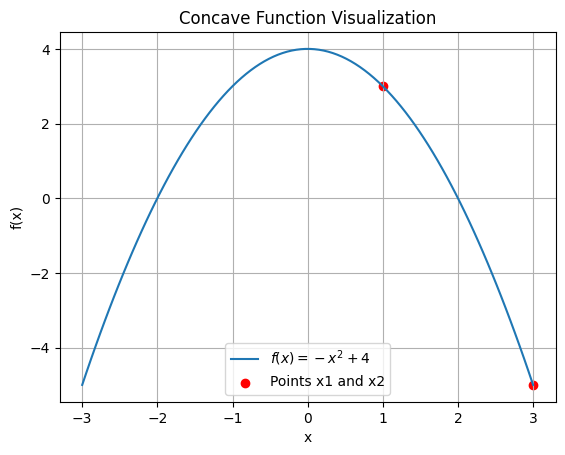

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define a concave function (negative of a quadratic function)
def f(x):
    return -x**2 + 4

# Check concavity: for any two points x1, x2 and lambda in [0, 1]
def is_concave(x1, x2, lam):
    lhs = f(lam * x1 + (1 - lam) * x2)  # f(λx1 + (1 - λ)x2)
    rhs = lam * f(x1) + (1 - lam) * f(x2)  # λf(x1) + (1 - λ)f(x2)
    return lhs >= rhs

# Points to check concavity
x1, x2 = 1.0, 3.0
lam = 0.5

# Check if the function is concave at points x1 and x2
concave_check = is_concave(x1, x2, lam)

print(f"Is the function concave between x1={x1} and x2={x2}? {concave_check}")

# Plot the function to visualize the concavity
x_vals = np.linspace(-3, 3, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='$f(x) = -x^2 + 4$')
plt.scatter([x1, x2], [f(x1), f(x2)], color='red', label='Points x1 and x2')
plt.title('Concave Function Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

#####**3.3.2.2 Global minimizers of convex functions**

A global minimizer of a convex function is a point $ x^* $ in the domain of the function $ f : \mathbb{R}^d \to \mathbb{R} $ such that $ f(x^*) \leq f(x) $ for all $ x \in \mathbb{R}^d $. For a convex function, this means that any local minimizer is also a global minimizer. A function $ f $ is convex if for any two points $ x_1, x_2 \in \mathbb{R}^d $ and any $ \lambda \in [0, 1] $, the function satisfies the inequality:$$ f(\lambda x_1 + (1 - \lambda) x_2) \leq \lambda f(x_1) + (1 - \lambda) f(x_2)$$

If $ f $ is convex and differentiable, then the global minimizer occurs at a point where the gradient $ \nabla f(x^*) = 0 $, and the function attains its lowest value. Convex functions are important in optimization because they guarantee that any minimizer found is a global one.


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimal point (global minimizer): [ 0.00000000e+00 -2.22044605e-16]
Function value at the global minimizer: 4.930380657631324e-32


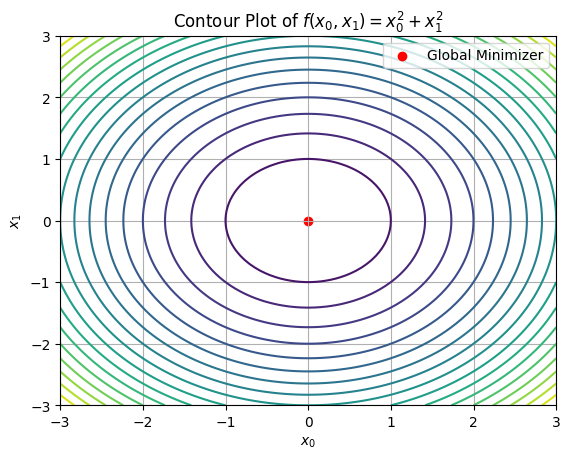

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define a convex function
def f(x):
    return x[0]**2 + x[1]**2  # This is a convex function (a quadratic)

# Gradient (first derivative) of the function
def grad_f(x):
    return np.array([2*x[0], 2*x[1]])

# Define the initial guess
x0 = np.array([2.0, 2.0])

# Use a minimizer function from scipy to find the global minimizer
res = minimize(f, x0, method='BFGS', jac=grad_f, options={'disp': True})

# Extract the optimal point
x_min = res.x

print(f"Optimal point (global minimizer): {x_min}")
print(f"Function value at the global minimizer: {f(x_min)}")

# Plot the function to visualize convexity and the global minimizer
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + Y**2

plt.contour(X, Y, Z, levels=20)
plt.scatter(x_min[0], x_min[1], color='red', label='Global Minimizer')
plt.title('Contour Plot of $f(x_0, x_1) = x_0^2 + x_1^2$')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend()
plt.grid(True)
plt.show()


#**3.3.3 Gradient descent**

Gradient descent is an iterative optimization algorithm used to find a local minimum of a differentiable function. Given an unconstrained minimization problem of the form $ \min_{x \in \mathbb{R}^d} f(x) $, where $ f $ is continuously differentiable, gradient descent works by iteratively updating the current point $ x $ in the direction of the negative gradient $ -\nabla f(x) $. The update rule is $ x_{k+1} = x_k - \alpha \nabla f(x_k) $, where $ \alpha $ is the step size (or learning rate). The goal is to move towards a point where the gradient is zero, indicating a stationary point, which could be a local or global minimizer depending on the function's structure. Gradient descent is particularly useful when finding all stationary points analytically is difficult or impossible, as it provides a numerical solution to the optimization problem.


Optimal point: 0.00014272476927059603
Function value at the optimal point: 2.0370359763344873e-08


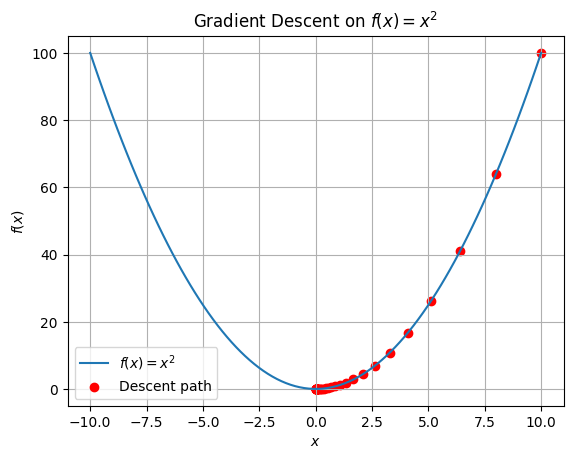

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x^2 (a simple convex function)
def f(x):
    return x**2

# Define the gradient of the function f(x) = x^2, which is f'(x) = 2x
def grad_f(x):
    return 2 * x

# Gradient Descent Algorithm
def gradient_descent(grad_f, initial_x, learning_rate, num_iterations):
    x = initial_x
    history = [x]  # To store the path of gradient descent
    for i in range(num_iterations):
        grad = grad_f(x)
        x = x - learning_rate * grad
        history.append(x)  # Store the updated x after each iteration
    return x, history

# Parameters for gradient descent
initial_x = 10.0  # Starting point
learning_rate = 0.1  # Step size
num_iterations = 50  # Number of iterations

# Run gradient descent
optimal_x, history = gradient_descent(grad_f, initial_x, learning_rate, num_iterations)

# Print the result
print(f"Optimal point: {optimal_x}")
print(f"Function value at the optimal point: {f(optimal_x)}")

# Plot the descent path
x_vals = np.linspace(-10, 10, 100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label='$f(x) = x^2$')
plt.scatter(history, [f(x) for x in history], color='red', label='Descent path')
plt.title('Gradient Descent on $f(x) = x^2$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()


#####**3.3.3.1 Steepest descent**

Steepest descent is an iterative optimization method used to find the local minimum of a differentiable function by moving in the direction of the steepest decrease, i.e., the direction of the negative gradient. At each iteration, the algorithm selects the step direction as the negative of the gradient $ -\nabla f(x_k) $, and the step size (learning rate) is typically chosen to minimize the function along this direction. The method continues iterating until the gradient becomes sufficiently small, indicating proximity to a local minimum. Steepest descent is similar to gradient descent but focuses on selecting the optimal step size at each iteration to ensure the most efficient reduction in the function's value.


Optimal point: [0. 0.]
Function value at the optimal point: 0.0


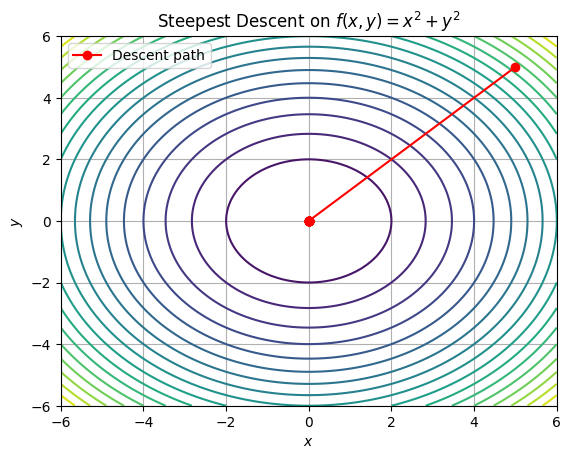

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the function f(x) = x^2 + y^2 (a convex function in 2D)
def f(x):
    return x[0]**2 + x[1]**2

# Define the gradient of the function
def grad_f(x):
    return np.array([2 * x[0], 2 * x[1]])

# Steepest Descent Algorithm with line search to find the optimal step size
def steepest_descent(grad_f, initial_x, num_iterations):
    x = np.array(initial_x)
    history = [x]  # To store the path of steepest descent

    for i in range(num_iterations):
        grad = grad_f(x)  # Compute the gradient at the current point

        # Line search: minimize f(x - alpha * grad) to find the optimal step size alpha
        def objective(alpha):
            return f(x - alpha * grad)

        result = minimize_scalar(objective)
        alpha = result.x  # Optimal step size

        # Update the current point
        x = x - alpha * grad
        history.append(x)  # Store the updated point

    return x, history

# Parameters for steepest descent
initial_x = [5.0, 5.0]  # Starting point
num_iterations = 20  # Number of iterations

# Run steepest descent
optimal_x, history = steepest_descent(grad_f, initial_x, num_iterations)

# Print the result
print(f"Optimal point: {optimal_x}")
print(f"Function value at the optimal point: {f(optimal_x)}")

# Plot the descent path
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + Y**2

plt.contour(X, Y, Z, levels=20)
history_np = np.array(history)
plt.plot(history_np[:, 0], history_np[:, 1], marker='o', color='red', label='Descent path')
plt.title('Steepest Descent on $f(x, y) = x^2 + y^2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.show()
